In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
files = [
    "chile_2000_2005.csv",
    "chile_2005_2010.csv",
    "chile_2010_2015.csv",
    "chile_2015_2020.csv",
    "chile_2020_2025.csv"
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

In [ ]:
df['type'].value_counts()


type
earthquake    36139
Name: count, dtype: int64

In [12]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
11441,2000-01-01 04:30:10.370000+00:00,-26.012,-68.803,105.0,4.5,mb,NaN,NaN,NaN,0.91,...,2014-11-07T01:09:14.812Z,"130 km ENE of Diego de Almagro, Chile",earthquake,NaN,NaN,NaN,15.0,reviewed,us,us
11440,2000-01-01 16:01:13.500000+00:00,-22.214,-70.191,67.2,4.4,mb,NaN,NaN,NaN,0.83,...,2014-11-07T01:09:15.804Z,"13 km S of Tocopilla, Chile",earthquake,NaN,14.1,NaN,4.0,reviewed,us,us
11439,2000-01-02 02:13:28.920000+00:00,-17.346,-69.277,161.6,3.7,mb,NaN,NaN,NaN,1.13,...,2014-11-07T01:09:15.988Z,"81 km E of Tarata, Peru",earthquake,NaN,11.4,NaN,2.0,reviewed,us,us
11438,2000-01-03 04:03:14.990000+00:00,-21.110,-68.424,134.4,4.0,mb,NaN,NaN,NaN,1.13,...,2014-11-07T01:09:16.772Z,"157 km NNE of Calama, Chile",earthquake,NaN,16.0,NaN,4.0,reviewed,us,us
11437,2000-01-06 21:37:49.760000+00:00,-18.334,-69.446,143.2,4.6,mb,NaN,NaN,NaN,0.73,...,2014-11-07T01:09:18.065Z,"Tarapaca, Chile",earthquake,NaN,8.8,NaN,7.0,reviewed,us,us


In [14]:
df.shape

(36139, 22)

In [15]:
df.dtypes

time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

In [17]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 9684
gap                 7648
dmin               25605
rms                17381
net                    0
id                     0
updated                0
place                  4
type                   0
horizontalError    25925
depthError         20543
magError           25699
magNst             18441
status                 0
locationSource         0
magSource              0
dtype: int64

In [21]:
cols_keep = [
    'time',
    'latitude',
    'longitude',
    'depth',
    'mag',
    'magType',
    'type'
]

df = df[cols_keep].copy()

In [22]:
df.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
type         0
dtype: int64

In [25]:
df['type'].value_counts()


type
earthquake    36139
Name: count, dtype: int64

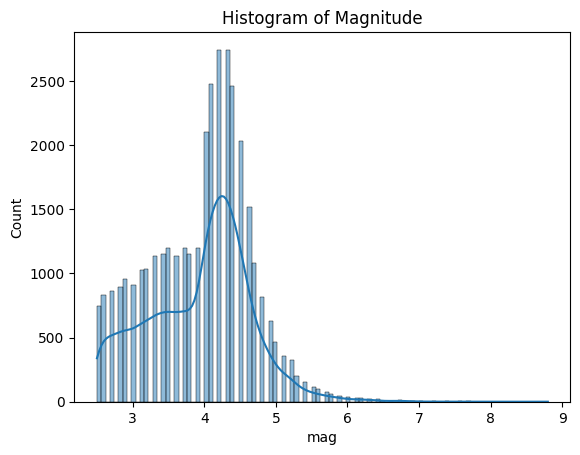

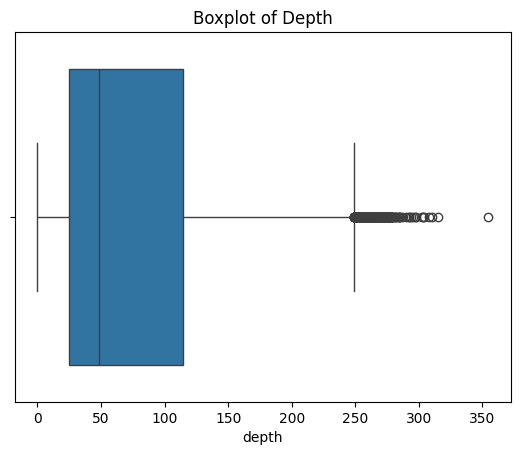

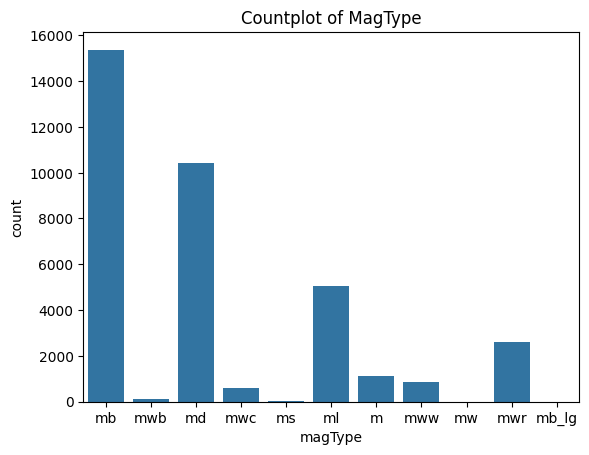

In [32]:
sns.histplot(data=df, x='mag', kde=True)
plt.title('Histogram of Magnitude')
plt.show()

sns.boxplot(data=df, x='depth')
plt.title('Boxplot of Depth')
plt.show()

sns.countplot(data=df, x='magType')
plt.title('Countplot of MagType')
plt.show()

In [33]:
df['magType'].value_counts(normalize=True)


magType
mb       0.425468
md       0.287916
ml       0.139766
mwr      0.071751
m        0.030521
mww      0.023825
mwc      0.016824
mwb      0.003680
ms       0.000138
mw       0.000083
mb_lg    0.000028
Name: proportion, dtype: float64

In [34]:
df.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
type         0
dtype: int64

In [40]:
df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
magType                   object
type                      object
dtype: object

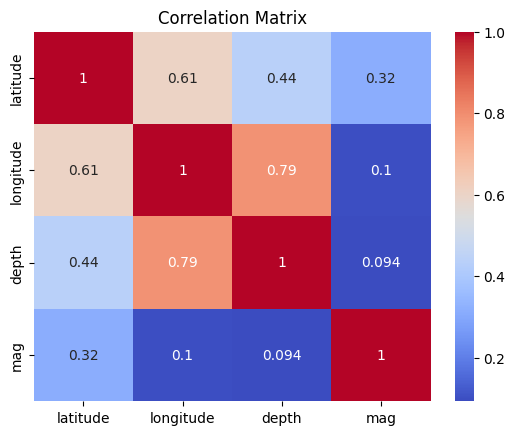

In [41]:
numeric_cols = ['latitude', 'longitude', 'depth', 'mag']

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Statistical Analysis to test hypothesis.

Hypothesis:

Null Hypothesis (H0): There is no statistically significant relationship between earthquake magnitude, its depth, spatial location, and the time elapsed since the previous earthquake.

Alternative Hypothesis (H1): There exists a statistically significant relationship between earthquake magnitude and at least one of the following variables: depth, spatial location, or the time elapsed since the previous earthquake.

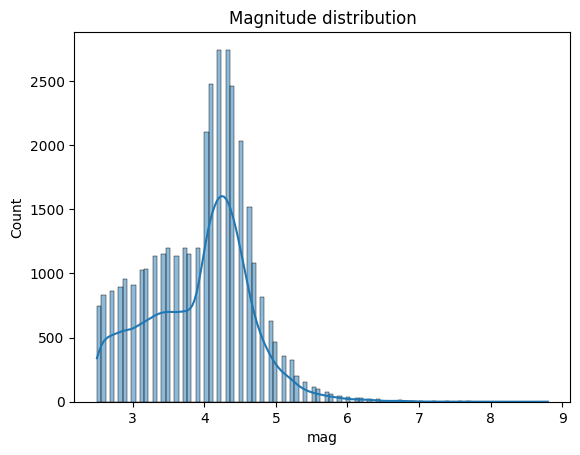

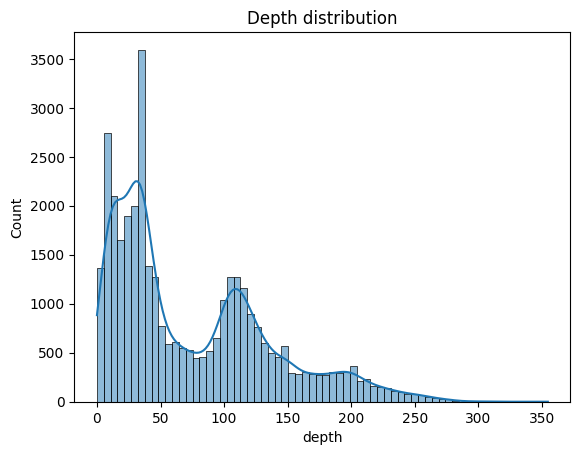

In [45]:
sns.histplot(data=df, x='mag', kde=True)
plt.title('Magnitude distribution')
plt.show()

sns.histplot(data=df, x='depth', kde=True)
plt.title('Depth distribution')
plt.show()



The distributions of magnitude and depth are non-normal and skewed, therefore non-parametric statistical tests were applied.

H0a: Earthquake magnitude is independent of earthquake depth.

In [46]:
from scipy.stats import spearmanr

rho, p = spearmanr(df['mag'], df['depth'])
print(f"Spearman rho = {rho:.3f}, p-value = {p:.5f}")


Spearman rho = 0.088, p-value = 0.00000


Although the relationship between earthquake magnitude and depth was statistically significant, the strength of the correlation was very weak (ρ = 0.088), indicating limited practical significance.

H0b: Earthquake magnitude is independent of spatial location.

In [48]:
df['lat_band'] = pd.cut(
    df['latitude'],
    bins=[-56, -42, -30, -17],
    labels=['South', 'Central', 'North']
)

In [49]:
from scipy.stats import kruskal

groups = [
    df[df['lat_band']=='South']['mag'],
    df[df['lat_band']=='Central']['mag'],
    df[df['lat_band']=='North']['mag']
]

stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H = {stat:.3f}, p-value = {p:.5f}")


Kruskal-Wallis H = 6275.253, p-value = 0.00000


The Kruskal–Wallis test indicated statistically significant differences in earthquake magnitude between spatial regions, suggesting spatial heterogeneity in seismic activity.

H0c: Earthquake magnitude is independent of the time elapsed since the previous earthquake

In [51]:
df = df.sort_values('time').reset_index(drop=True)
df['inter_event_time'] = df['time'].diff().dt.total_seconds()
df = df.dropna(subset=['inter_event_time'])

rho, p = spearmanr(df['mag'], df['inter_event_time'])
print(f"Spearman rho = {rho:.3f}, p-value = {p:.5f}")


Spearman rho = 0.098, p-value = 0.00000


Although a statistically significant correlation was found between earthquake magnitude and inter-event time (ρ = 0.098, p < 0.001), the correlation is very weak, indicating limited practical significance. This suggests that the elapsed time between earthquakes has minimal influence on the magnitude of the subsequent event.

The null hypothesis was rejected, as statistically significant relationships were identified between earthquake magnitude and both depth and spatial location. However, the observed temporal correlation is likely influenced by catalog completeness effects rather than a true physical trend.

ML

In [58]:
df['rolling_mag3'] = df['mag'].rolling(window=3).mean()
df = df.dropna(subset=['inter_event_time', 'rolling_mag3'])

In [59]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'type',
       'lat_band', 'year', 'inter_event_time', 'rolling_mag3'],
      dtype='object')

In [61]:
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

features = ['depth', 'latitude', 'longitude', 'inter_event_time', 'rolling_mag3']
target = 'mag'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [65]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.334
MAE: 0.239
R²: 0.266


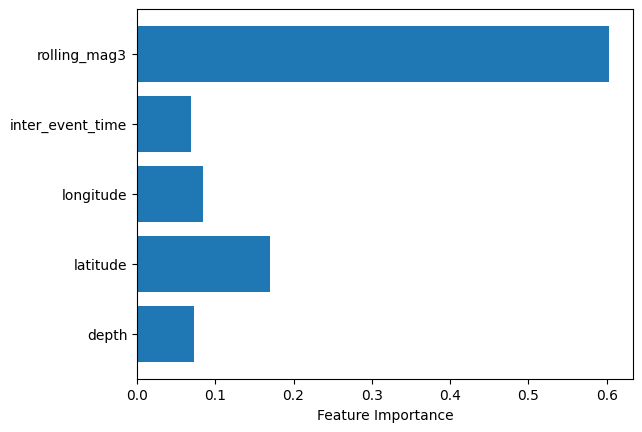

In [66]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()
